In [1]:
from hypersurface import *
import sympy as sp
from pprint import pprint
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

In [2]:
z0, z1, z2, z3, z4= sp.symbols('z0, z1, z2, z3, z4')
Z = [z0,z1,z2,z3,z4]
f = z0**5 + z1**5 + z2**5 + z3**5 + z4**5
HS = Hypersurface(Z, f, 1000)

In [3]:
def generate_H(ns):
    H_rand = np.random.rand(ns, ns)
    H_rand_pd = np.dot(H_rand, H_rand.transpose())
    return H_rand_pd

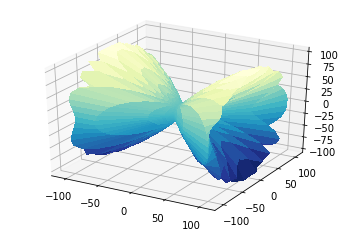

1356.094172000885


In [5]:
start_time = time.time()
HS.set_k(6)
patch = HS.patches[0].patches[0]

theta, phi = np.linspace(0.0001,np.pi+0.0001, 40), np.linspace(0.0001, 2*np.pi+0.0001, 40)
R = []
for j in phi:
    theta_list = []
    for i in theta:
        t = complex(math.sin(i)*math.sin(j), math.cos(i))/(sin(i)*cos(j)) 
        if np.absolute(t) <= 1:
            eta = patch.num_eta('identity', [1, -1, t, 0, -t])
        else:
            eta = patch.num_eta('identity',[1, -1, 1/t, 0, -1/t])
        theta_list.append(eta)
    R.append(theta_list)
R = np.asarray(R)
THETA, PHI = np.meshgrid(theta, phi)
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.YlGnBu_r,
    linewidth=0, antialiased=False)

plt.show()
print(time.time() - start_time)

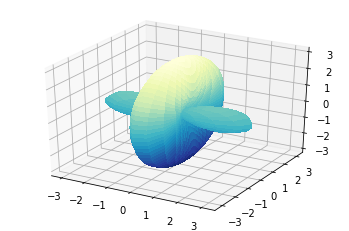

2.3787379264831543


In [4]:
start_time = time.time()
HS.set_k(1)
patch = HS.patches[0].patches[0]

theta, phi = np.linspace(0.0001,np.pi+0.0001, 40), np.linspace(0.0001, 2*np.pi+0.0001, 40)
R = []
for j in phi:
    theta_list = []
    for i in theta:
        t = complex(math.sin(i)*math.sin(j), math.cos(i))/(sin(i)*cos(j)) 
        if np.absolute(t) <= 1:
            eta = patch.num_eta('identity', [1, -1, t, 0, -t])
        else:
            eta = patch.num_eta('identity',[1, -1, 1/t, 0, -1/t])
        theta_list.append(eta)
    R.append(theta_list)
R = np.asarray(R)
THETA, PHI = np.meshgrid(theta, phi)
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.YlGnBu_r,
    linewidth=0, antialiased=False)

plt.show()
print(time.time() - start_time)

In [5]:
HS.set_k(3)
ns = HS.n_sections
patch = HS.patches[0].patches[0]

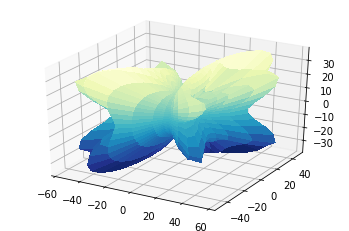

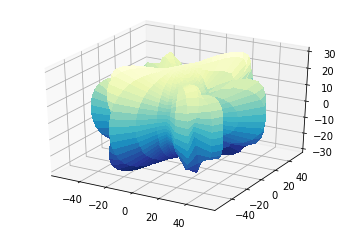

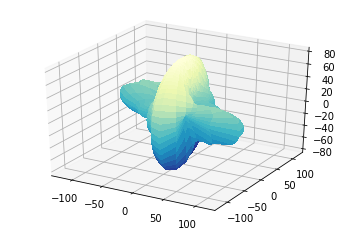

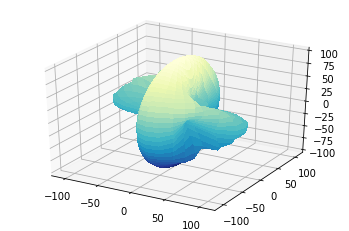

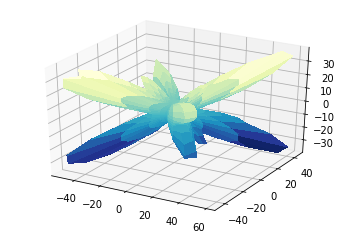

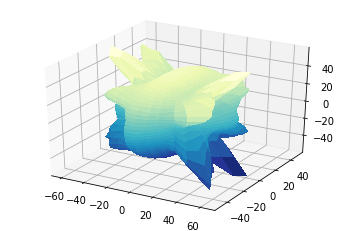

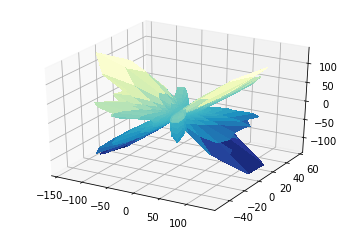

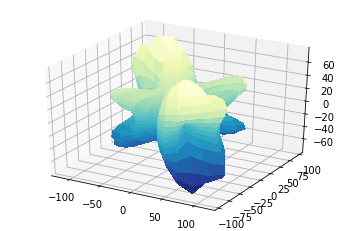

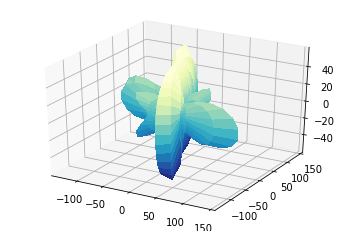

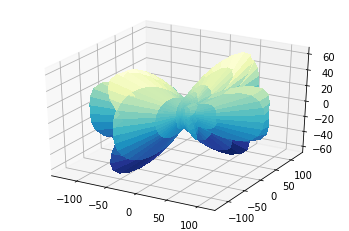

In [10]:
for i in range(10):
    H_rand_pd = generate_H(ns)
    theta, phi = np.linspace(0.0001,np.pi+0.0001, 40), np.linspace(0.0001, 2*np.pi+0.0001, 40)
    R = []
    for j in phi:
        theta_list = []
        for i in theta:
            t = complex(math.sin(i)*math.sin(j), math.cos(i))/(sin(i)*cos(j)) 
            if np.absolute(t) <= 1:
                eta = patch.num_eta(H_rand_pd, [1, -1, t, 0, -t])
            else:
                eta = patch.num_eta(H_rand_pd,[1, -1, 1/t, 0, -1/t])
            theta_list.append(eta)
        R.append(theta_list)
    R = np.asarray(R)
    THETA, PHI = np.meshgrid(theta, phi)
    X = R * np.sin(THETA) * np.cos(PHI)
    Y = R * np.sin(THETA) * np.sin(PHI)
    Z = R * np.cos(THETA)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    plot = ax.plot_surface(
        X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.YlGnBu_r,
        linewidth=0, antialiased=False)

    plt.show()

In [9]:
H_rand_pd 

array([[10.787493  ,  7.16902266,  7.60054454, ...,  8.20102781,
         9.69406   ,  7.85064323],
       [ 7.16902266,  9.89772431,  6.7782592 , ...,  6.18463951,
         8.91161048,  6.90093767],
       [ 7.60054454,  6.7782592 , 10.45840344, ...,  7.59409567,
         8.18360151,  7.53003671],
       ...,
       [ 8.20102781,  6.18463951,  7.59409567, ..., 10.50778015,
         9.24453455,  8.76227595],
       [ 9.69406   ,  8.91161048,  8.18360151, ...,  9.24453455,
        13.8145183 ,  9.5412237 ],
       [ 7.85064323,  6.90093767,  7.53003671, ...,  8.76227595,
         9.5412237 ,  9.3915279 ]])